## Machine Learning Project

For this project, we'll be taking an online data set and trying to predict whether or not a person is biologically male or female given certain facial features. This data set is available at https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset 

First, you'll want to download this data set and save it to your working directory as 'gender_classification_v7.csv'. Then, we can read it in as a pandas data frame called gender_df through the following command:

In [1]:
import pandas as pd

In [186]:
gender_df = pd.read_csv('gender_classification_v7.csv')

In [187]:
gender_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


Great! Now, in order for Python to be able to read this a little easier, we can convert gender to a number. To do this, we can enter the following command:

In [188]:
gender_df['gender_num'] = [0 if gender == "Female" else 1 for gender in gender_df['gender']]

What this does is first assigns the output to a column in gender_df called gender_num.

Next, it states that for each gender in gender_df\['gender'], if it is female, we assign the corresponding value in gender_num to be 0. Otherwise, we assign it to be 1 (the "else 1" does this)

In [189]:
gender_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_num
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,0
4997,1,11.9,5.4,0,0,0,0,Female,0
4998,1,12.9,5.7,0,0,0,0,Female,0
4999,1,13.2,6.2,0,0,0,0,Female,0


Next, to train the model, we'll want to install and import the following two packages and modules.

In [190]:
!pip install numpy
!pip install scikit-learn

We'll use numpy to convert our data set into an array, and train_test_split to split our data into training and testing sets. This is important because we are utilizing a process called supervised learning.

Supervised learning is giving the computer data that tells it what's right and what's wrong, and based on that data, it asks it to predict new data. Training data is the data that tells the computer what to do, and testing data contains the computer's predictions. Based on its predictions, we can tell how accurate the model is, and deem whether or not it is good enough to predict new data not in the data set.

In [191]:
import numpy as np
from sklearn.model_selection import train_test_split

In [192]:
gender_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_num
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,0
4997,1,11.9,5.4,0,0,0,0,Female,0
4998,1,12.9,5.7,0,0,0,0,Female,0
4999,1,13.2,6.2,0,0,0,0,Female,0


First, we'll want to split our data set into predictors and response. Our response is gender_num and our predictors are everything except gender and gender_num

We can convert our predictors and responses to arrays with the np.array command. Note that when we are selecting multiple columns from a data frame, we'll want to include double brackets.

In [193]:
x = np.array(gender_df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long',
                 'lips_thin', 'distance_nose_to_lip_long']])

In [194]:
y = np.array(gender_df['gender_num'])

Next, we can use the train_test_split function to split our data set up. Based on the x and y arrays, this splits it up into 4 variables. X_train and y_train contain the training set, and X_test and y_test contain the testing test. The test_size is 0.2, or 20% of our data, and random_state=42 just means that we have a different seed for randomization, enabling more consistent results.

In [195]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

After that, we'll want to import tree from sklearn to train a decision tree. 

A decision tree uses a tree structure to determine the response. For example, it could say "if someone has long hair and brown eyes, they are a woman". We will visualize this later, so don't worry if you don't fully understand it now!

In [196]:
from sklearn import tree

We will want to set a variable with a name of our choice (in this case, clf) to a decision tree classifier to tell Python we want to use a decision tree. A decision tree is made up of a bunch of if statements -- for example, from our previous example of "if someone has long hair and brown eyes, they are a woman", there are 2 conditions for being a woman, with a depth of 2. Here, we can specify max_depth to be 3 to make this easier to visualize. 

We then fit this model on our training data

In [197]:
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state=42)
clf = clf.fit(X_train, y_train)

Next, we can define the feature names (predictors) and class names (responses) to tell Python the names of the predictors and responses. Note that for class names, they are the names of each group of the response (male and female), not the name of the response itself (gender_num)

In [198]:
feature_names = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long',
                 'lips_thin', 'distance_nose_to_lip_long']
class_names = ['Female', 'Male']

Using the export_text function imported from sklearn.tree, we can print our the tree rules. We can see, for example, that if distance_nose_to_lip_long <= 0.5 (meaning that if the distance from the subject's nose to lip is short), nose_wide <= 0.5 (the subject's nose is not wide), and forehead_width_cm <= 14.35 (the width of the subject's forehead, in cm, is <= 14.35), we predict that the subject is a woman.

In [199]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names),
                        )
#print the result
print(tree_rules)

|--- distance_nose_to_lip_long <= 0.50
|   |--- nose_wide <= 0.50
|   |   |--- forehead_width_cm <= 14.35
|   |   |   |--- class: 0
|   |   |--- forehead_width_cm >  14.35
|   |   |   |--- class: 1
|   |--- nose_wide >  0.50
|   |   |--- nose_long <= 0.50
|   |   |   |--- class: 0
|   |   |--- nose_long >  0.50
|   |   |   |--- class: 1
|--- distance_nose_to_lip_long >  0.50
|   |--- nose_wide <= 0.50
|   |   |--- lips_thin <= 0.50
|   |   |   |--- class: 0
|   |   |--- lips_thin >  0.50
|   |   |   |--- class: 1
|   |--- nose_wide >  0.50
|   |   |--- nose_long <= 0.50
|   |   |   |--- class: 1
|   |   |--- nose_long >  0.50
|   |   |   |--- class: 1



To visualize this as a graph, we can import the graphviz package

In [200]:
import graphviz 

First, we'll want to define the data. We are using the clf model, with no file to save the graph to. The feature and class names have been defined. filled=True colors the boxed in and rounded=True makes the corners of the boxes round, 

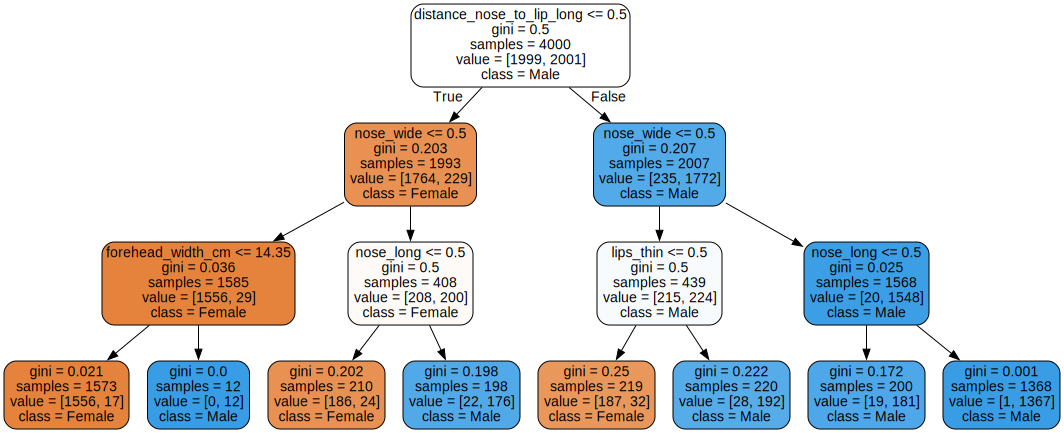

In [201]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_names,
                     class_names = class_names,
                     filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 

For each box, we are given a prediction. For example, if no information is given (the top box), we predict the subject to be male. However, the actual predictions given all the data come at the bottom row. Moving from the top down and to the left, if distance_nose_lip_long <= 0.5, nose_wide <= 0.5 and forehead_width_cm <= 14.35, we predict the subject to be female (as shown by class=Female). Moving to the right, if distance_nose_lip_long is not <= 14.35 (so distance_nose_lip_long > 14.35), nose_wide > 0.5, and nose_long > 0.5, we predict the subject to be male.

To find the accuracy of these predictions, we can use the testing data. First, we set y_pred to the predicted values based on the X_test data using the predict() function. Next, we can obtain an accuracy score based on said predictions

In [202]:
from sklearn.metrics import accuracy_score

In [203]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.962037962037962

This means that we were correct on approximately 96.2% of our model's guesses, which is pretty good!

Another form of machine learning is linear regression. Thinking of y=mx+b, this is essentially plotting a line of best fit, but for a lot more variables in this case.

First, we'll want to import the LinearRegression module, fit the model on the training data, and predict based on the testing inputs.

In [204]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)

Next, we'll want to clean the data. Since the responses are either 0 or 1, it wouldn't make sense to have guesses outside of that range. Therefore, if the guess (i) is < 0, it is set to 0, otherwise it is kept. Next, if it is >1, it is set to 1 -- otherwise, it stays the same

In [205]:
y_pred_lr = [0 if i < 0 else i for i in y_pred_lr]
y_pred_lr = [1 if i > 1 else i for i in y_pred_lr]

In [206]:
print(y_pred_lr[:10])

[1, 0, 0.23657445504473162, 1, 1, 0.7894454269214858, 1, 0.7582110815230724, 0.7086266542171241, 0]


To analyze our results, we can't use the accuracy_score function as our guesses are continuous -- they don't always fall on 0 or 1. Thus, we will want to find the mean absolute error. For example, if the value is 1 and our guess is 0.95, our mean absolute error is abs(1-0.95) = 0.05. This is the same calculation as our accuracy score. If we subtract our mean absolute error from 1, we can get our approximate value for how many predictions we got right.

In [207]:
from sklearn.metrics import mean_absolute_error

In [208]:
1-mean_absolute_error(y_test, y_pred_lr)

0.8824289995408384

In [209]:
1-mean_absolute_error(y_test, y_pred)

0.962037962037962

The linear regression model only has an accuracy of about 88.2%, so our decision tree model seems to fit better.